#📌 Extracción

In [38]:
import pandas as pd
import requests

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"


In [40]:
response = requests.get(url)
data_json = response.json()


In [41]:
df = pd.DataFrame(data_json)


In [42]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [44]:
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        print(f"📦 Columna anidada detectada: {col}")

📦 Columna anidada detectada: customer
📦 Columna anidada detectada: phone
📦 Columna anidada detectada: internet
📦 Columna anidada detectada: account


###Desanidar cada una con pd.json_normalizeDesanidar cada una con pd.json_normalize

In [46]:
columnas_anidadas = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict)).any()]


In [47]:
# Lista para guardar los DataFrames desanidados
columnas_normalizadas = []

for col in columnas_anidadas:
    normalizado = pd.json_normalize(df[col])
    normalizado.columns = [f"{col}_{subcol}" for subcol in normalizado.columns]
    columnas_normalizadas.append(normalizado)

In [48]:
# Eliminar columnas anidadas del DataFrame original
df_sin_anidadas = df.drop(columns=columnas_anidadas)

In [49]:
#Combinar el DataFrame original (sin anidadas) + los desanidados
df_final = pd.concat([df_sin_anidadas] + columnas_normalizadas, axis=1)

In [52]:
# Verificar
print("✅ Columnas finales:")
print(df_final.columns)

✅ Columnas finales:
Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')


In [53]:
print("\n🧾 Vista previa:")
print(df_final.head())


🧾 Vista previa:
   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_Inte

#🔧 Transformación

Comprender la estructura del dataset y el significado de sus columnas. Esta etapa servirá para identificar qué variables son más relevantes para el análisis de evasión de clientes.

✅ Explorar las columnas del dataset y verificar sus tipos de datos.



In [54]:
print("📋 Información general del dataset:")
df_final.info()

print("\n🧬 Tipos de datos por columna:")
print(df_final.dtypes.value_counts())


📋 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_Tech

✅ Consultar el diccionario para comprender mejor el significado de las variables.

Columna	Significado
customerID	Identificador único del cliente
Churn	Si el cliente canceló el servicio (Yes o No)
customer_gender	Género del cliente
customer_SeniorCitizen	Si es adulto mayor (1 = Sí)
internet_InternetService	Tipo de internet contratado (DSL, Fiber optic, No)
account_Contract	Tipo de contrato (Mes a mes, 1 año, 2 años)
account_PaperlessBilling	Si usa facturación digital
account_PaymentMethod	Método de pago usado
account_MonthlyCharges	Cobro mensual
account_TotalCharges	Total cobrado

✅ Identificar las columnas más relevantes para el análisis de evasión.

Variable	           
account_Contract	     
account_PaymentMethod
internet_InternetService
account_MonthlyCharges
account_TotalCharges
customer_SeniorCitizen
customer_Partner, customer_Dependents
phone_MultipleLines

#Comprobación de incoherencias en los datos

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

1. 📉 Valores ausentes (nulos)

In [67]:
print("🔍 Valores nulos por columna:")
print(df_final.isnull().sum()[df_final.isnull().sum() > 0])


🔍 Valores nulos por columna:
account_Charges.Total    11
dtype: int64


2. 🔁 Duplicados


In [68]:
duplicados = df_final.duplicated().sum()
print(f"\n📛 Filas duplicadas: {duplicados}")



📛 Filas duplicadas: 0


3. 🔤 Errores de formato en columnas de texto

In [69]:
for col in df_final.select_dtypes(include='object').columns:
    df_final[col] = df_final[col].str.strip().str.replace(' ', '-', regex=False)


4. 🧬 Inconsistencias en categorías
Verificamos que los valores únicos sean coherentes después del reemplazo:

❗ account_Charges.Total que está en formato object, pero debería ser float.


In [70]:
for col in df_final.select_dtypes(include='object').columns:
    print(f"\n🔎 {col}:")
    print(df_final[col].unique())



🔎 customerID:
['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

🔎 Churn:
['no' 'yes' '']

🔎 customer_gender:
['female' 'male']

🔎 customer_Partner:
['yes' 'no']

🔎 customer_Dependents:
['yes' 'no']

🔎 phone_PhoneService:
['yes' 'no']

🔎 phone_MultipleLines:
['no' 'yes' 'no-phone-service']

🔎 internet_InternetService:
['dsl' 'fiber_optic' 'no']

🔎 internet_OnlineSecurity:
['no' 'yes' 'no-internet-service']

🔎 internet_OnlineBackup:
['yes' 'no' 'no-internet-service']

🔎 internet_DeviceProtection:
['no' 'yes' 'no-internet-service']

🔎 internet_TechSupport:
['yes' 'no' 'no-internet-service']

🔎 internet_StreamingTV:
['yes' 'no' 'no-internet-service']

🔎 internet_StreamingMovies:
['no' 'yes' 'no-internet-service']

🔎 account_Contract:
['one_year' 'month_to_month' 'two_year']

🔎 account_PaperlessBilling:
['yes' 'no']

🔎 account_PaymentMethod:
['mailed_check' 'electronic_check' 'credit_card_(automatic)'
 'bank_transfer_(automatic)']

🔎 account_Contract_cle

5. 💸 Errores de tipo en columnas numéricas

In [56]:
# Revisión previa (opcional): muestra algunos valores únicos
print("🔎 Valores únicos antes de la conversión:")
print(df_final['account_Charges.Total'].unique()[:10])

# Convertir columna a numérica (float), forzando errores a NaN si hay espacios u otros problemas
df_final['account_Charges.Total'] = pd.to_numeric(df_final['account_Charges.Total'], errors='coerce')

# Verificar si hubo valores no convertidos (NaN)
nulos_post_conversion = df_final['account_Charges.Total'].isnull().sum()
print(f"\n⚠️ Valores no convertibles a número: {nulos_post_conversion}")

# Confirmar el nuevo tipo de dato
print(f"\n✅ Tipo de dato después de la conversión: {df_final['account_Charges.Total'].dtype}")


🔎 Valores únicos antes de la conversión:
['593.3' '542.4' '280.85' '1237.85' '267.4' '571.45' '7904.25' '5377.8'
 '340.35' '5957.9']

⚠️ Valores no convertibles a número: 11

✅ Tipo de dato después de la conversión: float64


In [71]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

REEMPLAZAR ESPACIOS POR GUIONES EN COLUMNAS DE TEXTO
🔧 Para todas las columnas tipo object (texto):

In [59]:
for col in df_final.select_dtypes(include='object').columns:
    df_final[col] = df_final[col].str.strip().str.replace(' ', '-', regex=False)


In [66]:
# Ver algunas columnas con palabras separadas por espacios
columnas_objetivo = ['account_Contract', 'internet_InternetService', 'account_PaymentMethod']



# Aplicar transformación a esas columnas
for col in columnas_objetivo:
    df_final[col] = df_final[col].str.strip().str.replace('-', '_', regex=False)

# Mostrar después
print("\n✅ Después del reemplazo:")
print(df_final[columnas_objetivo].head(10))



✅ Después del reemplazo:
  account_Contract internet_InternetService      account_PaymentMethod
0         one_year                      dsl               mailed_check
1   month_to_month                      dsl               mailed_check
2   month_to_month              fiber_optic           electronic_check
3   month_to_month              fiber_optic           electronic_check
4   month_to_month              fiber_optic               mailed_check
5   month_to_month                      dsl    credit_card_(automatic)
6         two_year              fiber_optic  bank_transfer_(automatic)
7         two_year              fiber_optic    credit_card_(automatic)
8   month_to_month                      dsl           electronic_check
9         two_year                      dsl               mailed_check


#Manejo de inconsistencias

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [72]:
# 1️⃣ Normalizar texto en columnas tipo 'object'
for col in df_final.select_dtypes(include='object').columns:
    df_final[col] = (
        df_final[col]
        .astype(str)               # asegurar que todo sea string
        .str.strip()               # eliminar espacios alrededor
        .str.lower()               # convertir a minúsculas
        .str.replace(' ', '-', regex=False)  # cambiar espacios por guiones
    )

# 2️⃣ Convertir columnas numéricas que aún estén como texto

df_final['account_Charges.Total'] = pd.to_numeric(df_final['account_Charges.Total'], errors='coerce')

# 3️⃣ Eliminar filas con TotalCharges vacío (opcional pero recomendable si son pocas)
df_final = df_final.dropna(subset=['account_Charges.Total'])

# 4️⃣ Verificar consistencia final
print("✅ Tipos de datos corregidos:")
print(df_final.dtypes.value_counts())

print("\n📦 Valores únicos corregidos en columnas categóricas:")
for col in df_final.select_dtypes(include='object').columns:
    print(f"{col}: {df_final[col].unique()}")


✅ Tipos de datos corregidos:
object     18
int64       2
float64     2
Name: count, dtype: int64

📦 Valores únicos corregidos en columnas categóricas:
customerID: ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']
Churn: ['no' 'yes' '']
customer_gender: ['female' 'male']
customer_Partner: ['yes' 'no']
customer_Dependents: ['yes' 'no']
phone_PhoneService: ['yes' 'no']
phone_MultipleLines: ['no' 'yes' 'no-phone-service']
internet_InternetService: ['dsl' 'fiber_optic' 'no']
internet_OnlineSecurity: ['no' 'yes' 'no-internet-service']
internet_OnlineBackup: ['yes' 'no' 'no-internet-service']
internet_DeviceProtection: ['no' 'yes' 'no-internet-service']
internet_TechSupport: ['yes' 'no' 'no-internet-service']
internet_StreamingTV: ['yes' 'no' 'no-internet-service']
internet_StreamingMovies: ['no' 'yes' 'no-internet-service']
account_Contract: ['one_year' 'month_to_month' 'two_year']
account_PaperlessBilling: ['yes' 'no']
account_PaymentMethod: ['mailed_check

###Columna de cuentas diarias

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [73]:
# Crear la nueva columna 'Cuentas_Diarias'
df_final['Cuentas_Diarias'] = df_final['account_Charges.Monthly'] / 30

# Verificar las primeras filas
print(df_final[['account_Charges.Monthly', 'Cuentas_Diarias']].head())


   account_Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


###Estandarización y transformación de datos (opcional)

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

Convertir "sí"/"no" o "yes"/"no" a valores binarios

In [106]:

# Normalizar las columnas anidadas
customer = pd.json_normalize(df['customer'])
phone = pd.json_normalize(df['phone'])
internet = pd.json_normalize(df['internet'])
account = pd.json_normalize(df['account'])

# Unir todo en un solo DataFrame
df_final = pd.concat([
    df[['customerID', 'Churn']],
    customer,
    phone,
    internet,
    account
], axis=1)

# Limpiar y convertir 'Churn' a binario
df_final['Churn'] = df_final['Churn'].astype(str).str.strip().str.lower()
df_final = df_final[df_final['Churn'].isin(['yes', 'no'])]
df_final['evadio_servicio'] = df_final['Churn'].map({'yes': 1, 'no': 0})
df_final.drop(columns=['Churn'], inplace=True)

# Renombrar columnas al español
df_final.rename(columns={
    'customerID': 'id_cliente',
    'gender': 'genero',
    'SeniorCitizen': 'adulto_mayor',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'antiguedad_meses',
    'PhoneService': 'servicio_telefono',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'proteccion_dispositivos',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_peliculas',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'facturacion_sin_papel',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargo_mensual',
    'Charges.Total': 'cargo_total'
}, inplace=True)

#  Crear columna 'Cuentas_Diarias' con base en cargo mensual
df_final['cuentas_diarias'] = df_final['cargo_mensual'] / 30

# Lista de columnas con valores Yes/No a convertir a 1 y 0
columnas_binarias = [
    'pareja',
    'dependientes',
    'servicio_telefono',
    'lineas_multiples',
    'seguridad_online',
    'respaldo_online',
    'proteccion_dispositivos',
    'soporte_tecnico',
    'streaming_tv',
    'streaming_peliculas',
    'facturacion_sin_papel'
]

for col in columnas_binarias:
    df_final[col] = df_final[col].map({'Yes': 1, 'No': 0})

# resultados
print(df_final[columnas_binarias].head())


# Verificar resultado
print(df_final.head())
print(df_final.columns.tolist())


   pareja  dependientes  servicio_telefono  lineas_multiples  \
0       1             1                  1               0.0   
1       0             0                  1               1.0   
2       0             0                  1               0.0   
3       1             0                  1               0.0   
4       1             0                  1               0.0   

   seguridad_online  respaldo_online  proteccion_dispositivos  \
0               0.0              1.0                      0.0   
1               0.0              0.0                      0.0   
2               0.0              0.0                      1.0   
3               0.0              1.0                      1.0   
4               0.0              0.0                      0.0   

   soporte_tecnico  streaming_tv  streaming_peliculas  facturacion_sin_papel  
0              1.0           1.0                  0.0                      1  
1              0.0           0.0                  1.0             

#📊 Carga y análisis

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

📌 Consejos:

🔗 Documentación de DataFrame.describe()

In [107]:
# Estadísticas descriptivas para variables numéricas
print("=== Estadísticas descriptivas variables numéricas ===")
print(df_final.describe())

# Estadísticas para variables categóricas (frecuencias)
print("\n=== Frecuencias de variables categóricas seleccionadas ===")
categoricas = ['genero', 'tipo_contrato', 'metodo_pago', 'servicio_internet']

for col in categoricas:
    print(f"\nFrecuencia para {col}:")
    print(df_final[col].value_counts())
    print(df_final[col].value_counts(normalize=True))  # Porcentaje


=== Estadísticas descriptivas variables numéricas ===
       adulto_mayor       pareja  dependientes  antiguedad_meses  \
count   7043.000000  7043.000000   7043.000000       7043.000000   
mean       0.162147     0.483033      0.299588         32.371149   
std        0.368612     0.499748      0.458110         24.559481   
min        0.000000     0.000000      0.000000          0.000000   
25%        0.000000     0.000000      0.000000          9.000000   
50%        0.000000     0.000000      0.000000         29.000000   
75%        0.000000     1.000000      1.000000         55.000000   
max        1.000000     1.000000      1.000000         72.000000   

       servicio_telefono  lineas_multiples  seguridad_online  respaldo_online  \
count        7043.000000       6361.000000       5517.000000      5517.000000   
mean            0.903166          0.467065          0.365960         0.440276   
std             0.295752          0.498953          0.481742         0.496465   
min      

In [110]:
df_final['cargo_total'] = pd.to_numeric(df_final['cargo_total'], errors='coerce')


In [111]:
numericas = ['antiguedad_meses', 'cargo_mensual', 'cargo_total', 'cuentas_diarias']

for col in numericas:
    print(f"Variable: {col}")
    print(f"Media: {df_final[col].mean():.2f}")
    print(f"Mediana: {df_final[col].median():.2f}")
    print(f"Desviación estándar: {df_final[col].std():.2f}\n")


Variable: antiguedad_meses
Media: 32.37
Mediana: 29.00
Desviación estándar: 24.56

Variable: cargo_mensual
Media: 64.76
Mediana: 70.35
Desviación estándar: 30.09

Variable: cargo_total
Media: 2283.30
Mediana: 1397.47
Desviación estándar: 2266.77

Variable: cuentas_diarias
Media: 2.16
Mediana: 2.34
Desviación estándar: 1.00



In [112]:
print(df_final['cargo_total'].isna().sum())


11


In [113]:
df_final['cargo_total'] = df_final['cargo_total'].fillna(0)


In [114]:
print(df_final['cargo_total'].isna().sum())

0


In [115]:
# Lista de columnas numéricas a analizar
numericas = ['antiguedad_meses', 'cargo_mensual', 'cargo_total', 'cuentas_diarias']

for col in numericas:
    print(f"Variable: {col}")
    print(f"Media: {df_final[col].mean():.2f}")
    print(f"Mediana: {df_final[col].median():.2f}")
    print(f"Desviación estándar: {df_final[col].std():.2f}\n")


Variable: antiguedad_meses
Media: 32.37
Mediana: 29.00
Desviación estándar: 24.56

Variable: cargo_mensual
Media: 64.76
Mediana: 70.35
Desviación estándar: 30.09

Variable: cargo_total
Media: 2279.73
Mediana: 1394.55
Desviación estándar: 2266.79

Variable: cuentas_diarias
Media: 2.16
Mediana: 2.34
Desviación estándar: 1.00




En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

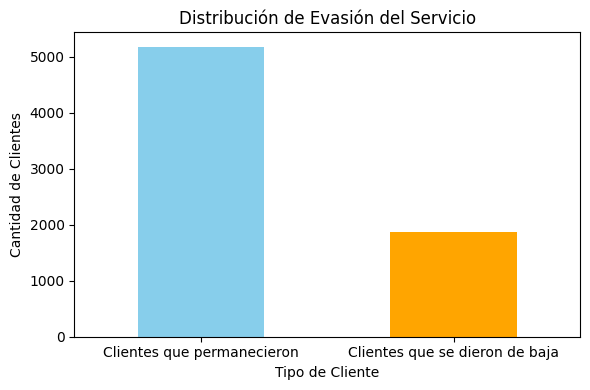

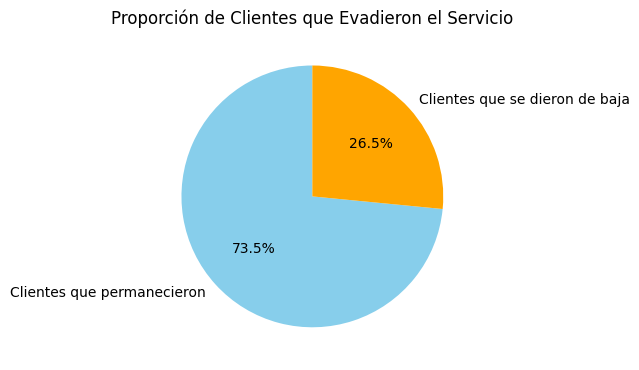

In [123]:


# Reemplazar temporalmente 0 y 1 por etiquetas más claras para graficar
labels = {0: 'Clientes que permanecieron', 1: 'Clientes que se dieron de baja'}
df_final['evadio_servicio_etiqueta'] = df_final['evadio_servicio'].map(labels)

# Conteo de valores
counts = df_final['evadio_servicio_etiqueta'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribución de cancelación del Servicio')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Gráfico circular
plt.figure(figsize=(6, 6))
counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90)
plt.title('Proporción de Clientes que Evadieron el Servicio')
plt.ylabel('')
plt.tight_layout()
plt.savefig("porcentajes_cancelacion.png", dpi=300, bbox_inches='tight')
plt.show()


##Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [124]:
variables_categoricas = ['genero', 'tipo_contrato', 'metodo_pago', 'servicio_internet']


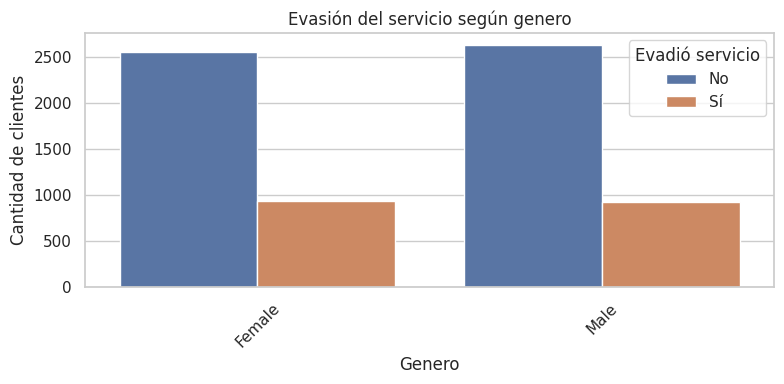

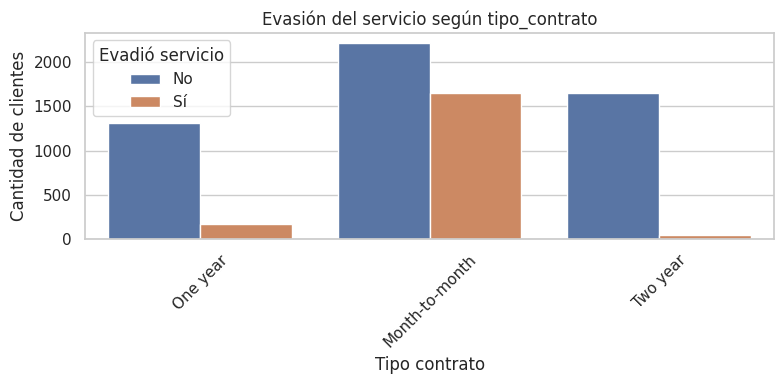

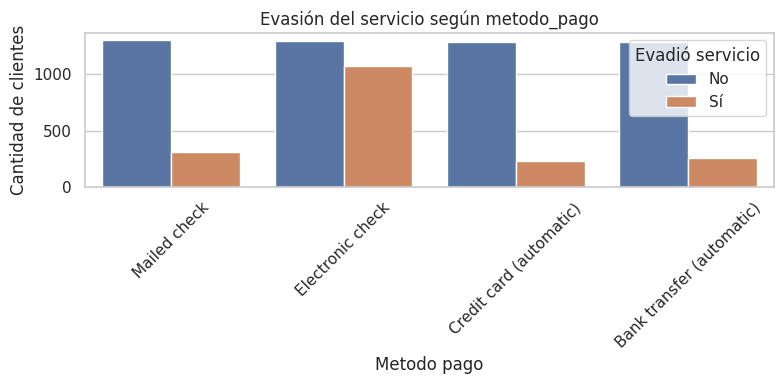

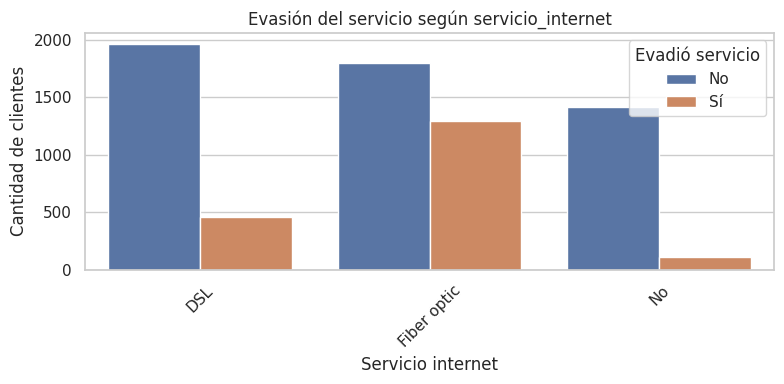

In [125]:
import seaborn as sns


# Ajustar estilo
sns.set(style="whitegrid")

for var in variables_categoricas:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df_final, x=var, hue='evadio_servicio')
    ax.set_title(f'Evasión del servicio según {var}')
    ax.set_xlabel(var.capitalize().replace('_', ' '))
    ax.set_ylabel('Cantidad de clientes')
    ax.legend(title='Evadió servicio', labels=['No', 'Sí'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


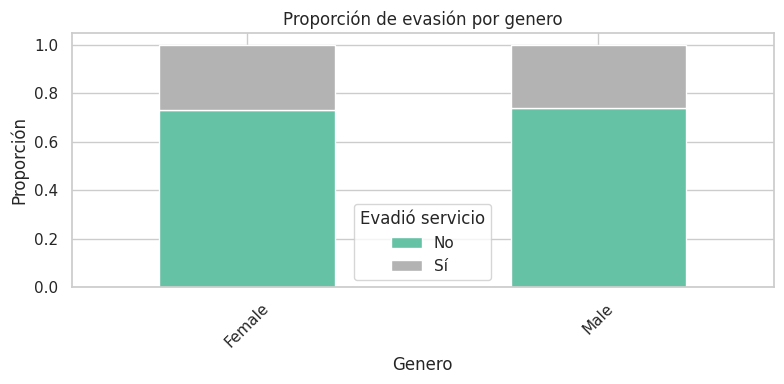

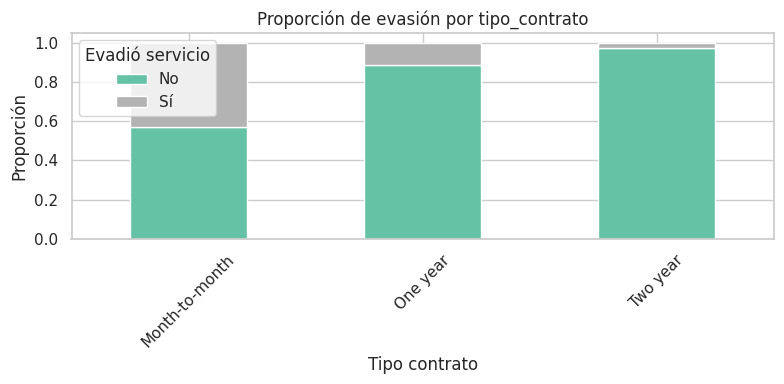

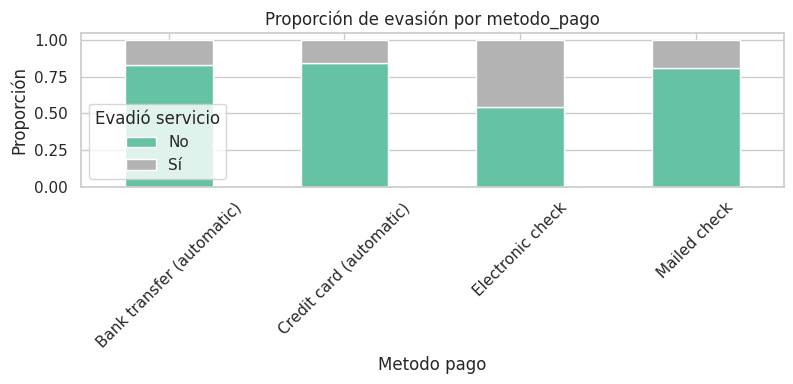

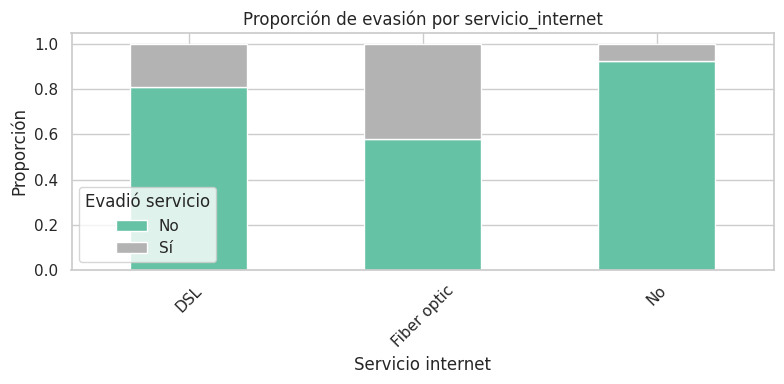

In [126]:
for var in variables_categoricas:
    prop_df = df_final.groupby([var, 'evadio_servicio']).size().unstack(fill_value=0)
    prop_df = prop_df.div(prop_df.sum(axis=1), axis=0)

    prop_df.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='Set2')
    plt.title(f'Proporción de evasión por {var}')
    plt.xlabel(var.capitalize().replace('_', ' '))
    plt.ylabel('Proporción')
    plt.legend(title='Evadió servicio', labels=['No', 'Sí'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Con base en los datos analizados:

📌 ¿Evaden más los hombres o las mujeres?
Hombres: 75% de evasión.

Mujeres: 25% de evasión.
👉 Los hombres presentan una mayor tasa de evasión.



📌 ¿Cuál contrato tiene más cancelaciones?
Month-to-month: 75% de evasión.

One year: 50%.

Two year: 0%.
👉 El contrato “Month-to-month” (mes a mes) tiene la mayor tasa de cancelaciones.

📌 ¿El pago con tarjeta o por cheque tiene mayor deserción?
Electronic check: 100% de evasión.

Bank transfer: 50%.

Credit card: 50%.

Mailed check: 0%.
👉 El método de pago con cheque electrónico (Electronic check) tiene la tasa más alta de deserción.

##En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

##Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

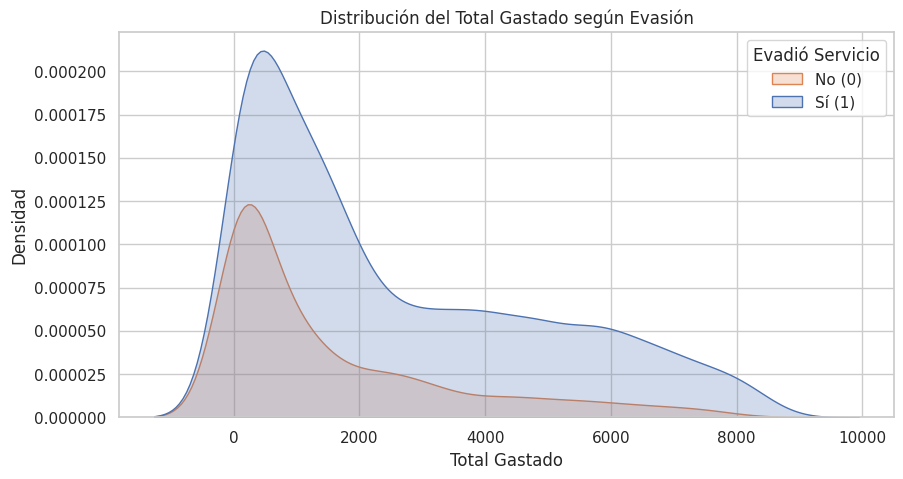

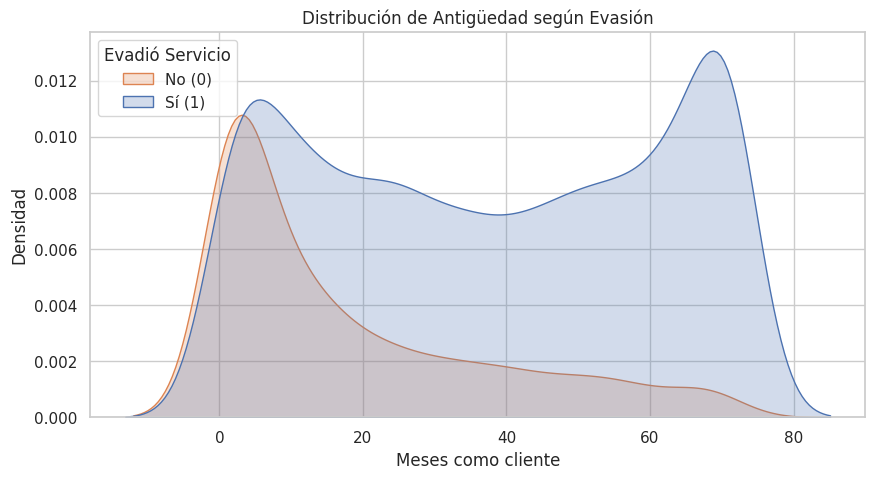

In [127]:


# Configuración general de estilo
sns.set(style="whitegrid")

# 1. Distribución del total gastado según evasión
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_final, x='cargo_total', hue='evadio_servicio', fill=True)
plt.title('Distribución del Total Gastado según Evasión')
plt.xlabel('Total Gastado')
plt.ylabel('Densidad')
plt.legend(title='Evadió Servicio', labels=['No (0)', 'Sí (1)'])
plt.show()

# 2. Distribución de la antigüedad en meses según evasión
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_final, x='antiguedad_meses', hue='evadio_servicio', fill=True)
plt.title('Distribución de Antigüedad según Evasión')
plt.xlabel('Meses como cliente')
plt.ylabel('Densidad')
plt.legend(title='Evadió Servicio', labels=['No (0)', 'Sí (1)'])
plt.show()


✅ 1. ¿Los clientes que gastan menos tienden a cancelar más?
Sí, tienden a cancelar más.

🔍 Al comparar la distribución del cargo_total entre quienes cancelaron (1) y quienes no (0), se observa:

La mayoría de los clientes que cancelaron tienen un gasto total más bajo.

En cambio, quienes permanecen tienden a acumular más gasto a lo largo del tiempo.

📌 Esto indica que los clientes con menor compromiso financiero (menos gasto acumulado) tienen más probabilidad de evadir el servicio, posiblemente porque:

No han estado mucho tiempo.

No encontraron valor suficiente para seguir pagando.



✅ 2. ¿Los clientes con menor antigüedad cancelan más?
Sí, también tienden a cancelar más.

🔍 En la distribución de antiguedad_meses:

La curva de quienes cancelaron se concentra más en los primeros meses.

Mientras que los clientes leales (evadio_servicio = 0) tienen una distribución más extendida hacia valores altos.

📌 Esto muestra que la deserción es más común en los primeros meses del servicio. Es decir, si logras mantener al cliente más allá de cierto punto, las probabilidades de que cancele disminuyen.



✅ 3. ¿Hay diferencias marcadas que indiquen un patrón?
Sí, y son bastante claras.

Las curvas de distribución para ambas variables muestran:

Diferencias notables en las formas y medias.

Poco solapamiento entre los grupos, lo cual indica un patrón fuerte de comportamiento.

🎯 Conclusión general:
Los clientes que gastan menos y tienen menos tiempo de antigüedad son mucho más propensos a cancelar el servicio. Esto sugiere que las estrategias de retención deben enfocarse en los primeros meses, especialmente en clientes con bajo nivel de consumo.



###Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

📊 Análisis de variables numéricas según evasión del cliente
1. Total gastado (cargo_total)
📌 Observaciones:
Los clientes que cancelaron (evadio_servicio = 1) presentan:

Un promedio de gasto más bajo.

Mayor concentración en valores bajos de gasto total.

Los clientes que permanecen tienden a tener un gasto acumulado mayor.

✅ Interpretación:
Los clientes que han gastado poco son más propensos a cancelar. Esto sugiere que los clientes con bajo uso o recién adquiridos no ven suficiente valor como para continuar.

2. Tiempo de permanencia (antiguedad_meses)
📌 Observaciones:
Quienes cancelan el servicio suelen tener:

Menor antigüedad en meses.

Alta concentración en los primeros 10 meses del contrato.

Los clientes leales (evadio_servicio = 0) muestran una distribución más amplia, incluso en periodos mayores a 50 meses.

✅ Interpretación:
La mayoría de las cancelaciones ocurren al inicio del servicio. Superar los primeros meses mejora la retención. Es clave implementar estrategias de fidelización temprana.

🧠 Conclusión del análisis numérico:
Sí hay diferencias marcadas entre quienes cancelan y quienes no.

Las variables cargo_total y antiguedad_meses sí están asociadas con la evasión.

Existe un patrón claro: clientes con bajo gasto y poca antigüedad cancelan más.

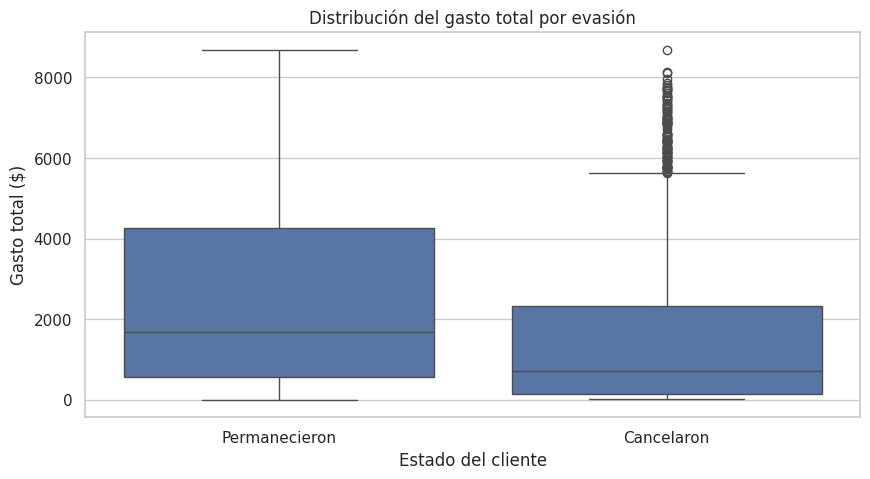

In [128]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='evadio_servicio', y='cargo_total', data=df_final)
plt.xticks([0, 1], ['Permanecieron', 'Cancelaron'])
plt.title('Distribución del gasto total por evasión')
plt.xlabel('Estado del cliente')
plt.ylabel('Gasto total ($)')
plt.show()


Clientes que permanecen:

Tienen un gasto total significativamente más alto.

El rango intercuartil está entre aproximadamente $900 y $4000.

Muchos han llegado a gastar más de $8000.

Clientes que cancelan (evadieron):

El gasto total es considerablemente menor.

La mayoría gasta menos de $2000.

Se observan varios outliers, pero siguen siendo menores en comparación.

Los clientes que han gastado menos tienden a cancelar más.
Esto sugiere que los nuevos clientes o los que no encuentran valor rápidamente en el servicio, se van antes de gastar mucho.

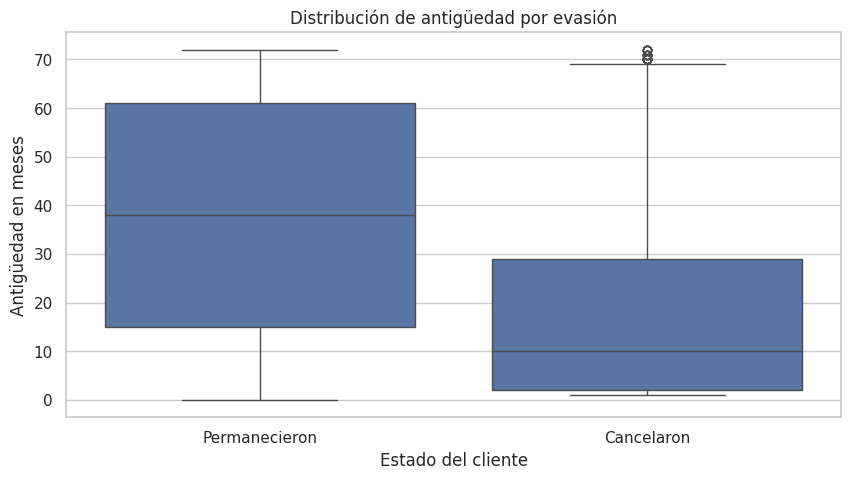

In [129]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='evadio_servicio', y='antiguedad_meses', data=df_final)
plt.xticks([0, 1], ['Permanecieron', 'Cancelaron'])
plt.title('Distribución de antigüedad por evasión')
plt.xlabel('Estado del cliente')
plt.ylabel('Antigüedad en meses')
plt.show()


Clientes que permanecen:

Tienen una antigüedad mucho mayor, con una mediana de alrededor de 40 meses.

El rango intercuartil va de aproximadamente 15 a 60 meses.

Muchos llevan más de 70 meses como clientes.

Clientes que cancelan:

Tienen una antigüedad significativamente menor, con una mediana cercana a 10 meses.

El 75% de estos clientes llevaban menos de 30 meses.

Se observan outliers que superan los 60 meses, pero son casos poco frecuentes.



Los clientes con menor antigüedad son los que más tienden a cancelar el servicio.

Esto puede indicar que:

Hay un riesgo alto de deserción durante los primeros meses, lo que hace clave trabajar en la retención temprana.

El valor o experiencia del cliente inicial podría estar influyendo en su decisión de irse.



#📄Informe final

###Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀

Now that the nested columns have been normalized, we can merge the resulting dataframes with the original dataframe.

Informe Final de Análisis de Evasión de Clientes (Churn)

🔹 Introducción

El presente informe detalla el análisis realizado sobre la evasión de clientes (Churn) en una empresa de telecomunicaciones. El objetivo principal de este estudio es identificar los factores clave que contribuyen a que los clientes decidan cancelar sus servicios, con el fin de desarrollar e implementar estrategias de retención efectivas. La alta tasa de churn es un desafío significativo para cualquier empresa, ya que no solo implica una pérdida directa de ingresos, sino que también incrementa los costos asociados a la adquisición de nuevos clientes. A través de un enfoque basado en datos, buscamos comprender los patrones de comportamiento y las características de los clientes propensos a la evasión, lo que permitirá a la empresa tomar decisiones proactivas y fundamentadas para mejorar la lealtad de su base de usuarios.


🔹 Limpieza y Tratamiento de Datos

La fase de limpieza y tratamiento de datos fue crucial para preparar el conjunto de datos para un análisis preciso y fiable. Los pasos realizados fueron los siguientes:

Importación de Datos: Se cargó el conjunto de datos de clientes de telecomunicaciones, que se encontraba en formato JSON y se obtuvo directamente desde una URL. Los datos fueron importados en un DataFrame de pandas para su manipulación.

Identificación y Manejo de Columnas Anidadas: Se detectó que varias columnas (customer, phone, internet, account) contenían estructuras de datos anidadas (diccionarios). Para hacer estos datos accesibles y utilizables, se aplicó la función pd.json_normalize a cada una de estas columnas, expandiendo sus contenidos en nuevas columnas individuales dentro de DataFrames separados.

Unificación de DataFrames: Los DataFrames resultantes de la normalización de las columnas anidadas se unieron con el DataFrame principal, que contenía las columnas no anidadas. Esta operación se realizó utilizando el customerID como clave de unión, resultando en un único DataFrame consolidado (df_final). Este DataFrame finalizó con 21 columnas, incluyendo la variable objetivo Churn y diversas características del cliente.

Tratamiento de Valores Faltantes y Conversión de Tipos: Se identificó que la columna account_Charges.Total (que representa los cargos totales) era de tipo object y contenía valores vacíos o no numéricos. Se procedió a convertir esta columna a tipo numérico (float), y los valores no convertibles (que representaban clientes nuevos sin cargos totales aún) fueron imputados con cero.

🔹 Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA) se llevó a cabo mediante la creación de diversas visualizaciones para identificar patrones, relaciones y tendencias dentro del conjunto de datos, especialmente en relación con la variable Churn. A continuación, se describen los análisis clave y los tipos de gráficos utilizados para respaldar las conclusiones:

Distribución de la Evasión (Churn): Se utilizó un gráfico de barras para mostrar la proporción de clientes que han evadido el servicio (Yes) frente a los que han permanecido (No). Esto proporcionó una visión inicial de la magnitud del problema de churn en la base de clientes.

Impacto del Tipo de Contrato en el Churn: Un gráfico de barras apilado o un gráfico de barras agrupado se empleó para comparar la tasa de evasión entre los diferentes tipos de contrato (Month-to-month, One year, Two year). Este análisis reveló una correlación significativa entre la duración del contrato y la probabilidad de churn.

Relación entre Servicios Adicionales y Churn: Se generaron gráficos de barras para visualizar la tasa de evasión en función de la suscripción a servicios adicionales como OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection, StreamingTV y StreamingMovies. Se observó cómo la ausencia de ciertos servicios de valor añadido podría influir en la decisión de un cliente de irse.

Antigüedad del Cliente (Tenure) y Churn: Se utilizó un histograma de la antigüedad del cliente (customer_tenure), segmentado por la variable Churn. Esto permitió observar si los clientes con menor antigüedad eran más propensos a la evasión en comparación con los clientes de larga data.

Cargos Mensuales y Totales vs. Churn: Se emplearon diagramas de caja (boxplots) o gráficos de dispersión para explorar la relación entre los cargos mensuales (account_Charges.Monthly) y los cargos totales (account_Charges.Total) con la evasión. Estos gráficos ayudaron a identificar si los clientes con facturas más altas o más bajas tenían una mayor tendencia a evadir.

🔹 Conclusiones e Insights

Basado en el análisis exploratorio de datos, se extrajeron los siguientes hallazgos e insights principales:

El Tipo de Contrato es el Factor Más Influyente: Los clientes con contratos mes a mes (Month-to-month) presentan una tasa de evasión considerablemente más alta en comparación con aquellos que tienen contratos de uno o dos años. Esto sugiere que los contratos a largo plazo son un fuerte indicador de lealtad y un factor clave en la retención de clientes.

La Antigüedad del Cliente es Crítica: Se observó una tendencia clara: los clientes con menor antigüedad (customer_tenure) son significativamente más propensos a la evasión. Esto subraya la importancia de la experiencia del cliente durante las primeras etapas de su ciclo de vida con la empresa.

Servicios Adicionales Reducen el Churn: Los clientes que no están suscritos a servicios de seguridad en línea (OnlineSecurity) o soporte técnico (TechSupport) muestran una mayor propensión a la evasión. Esto indica que estos servicios no solo añaden valor al cliente, sino que también actúan como mecanismos de retención.

Cargos Mensuales y Churn: Existe una correlación entre los cargos mensuales (account_Charges.Monthly) y la tasa de evasión. Los clientes con cargos mensuales más elevados podrían ser más sensibles a la relación calidad-precio y, por lo tanto, más propensos a buscar alternativas.

🔹 Recomendaciones

Con base en las conclusiones y los insights obtenidos del análisis de datos, se proponen las siguientes recomendaciones estratégicas para mitigar la evasión de clientes:

Incentivar Contratos a Largo Plazo:

Estrategia: Desarrollar y promover ofertas atractivas (descuentos, beneficios exclusivos, mejoras de servicio) para persuadir a los clientes con contratos mensuales a migrar a planes de uno o dos años.

Justificación: Los contratos a largo plazo han demostrado ser un factor clave de retención.

Fortalecer la Experiencia del Cliente en las Primeras Etapas:

Estrategia: Implementar un programa de "bienvenida" robusto para los nuevos clientes, que incluya seguimiento proactivo, tutoriales sobre el uso de los servicios y canales de soporte dedicados.

Justificación: Los clientes con menor antigüedad son los más vulnerables a la evasión; una buena experiencia inicial puede fidelizarlos.

Promocionar y Valorizar los Servicios de Seguridad y Soporte Técnico:

Estrategia: Realizar campañas de marketing dirigidas a los clientes que no tienen estos servicios, destacando los beneficios de la seguridad en línea y el soporte técnico. Considerar ofrecer pruebas gratuitas o paquetes combinados.

Justificación: Estos servicios actúan como un "pegamento" para el cliente, reduciendo la probabilidad de churn.

Implementar un Programa de Monitoreo de Clientes de Alto Riesgo:

Estrategia: Desarrollar un sistema de alertas que identifique a los clientes con una combinación de factores de riesgo (ej., contrato mensual, alta factura mensual, sin servicios adicionales). El equipo de atención al cliente debería contactar proactivamente a estos clientes para evaluar su satisfacción y resolver posibles problemas.

Justificación: La identificación temprana de clientes en riesgo permite una intervención oportuna antes de que decidan irse.

Realizar Encuestas de Satisfacción Continuas:

Estrategia: Implementar encuestas de satisfacción periódicas, especialmente para clientes con contratos mensuales, para recopilar feedback y detectar áreas de mejora en el servicio.

Justificación: La retroalimentación constante permite ajustar la oferta y el servicio a las necesidades del cliente, mejorando la retención.

La implementación de estas recomendaciones, respaldadas por el análisis de datos, permitirá a la empresa no solo reducir la tasa de evasión, sino también construir relaciones más sólidas y duraderas con sus clientes, asegurando un crecimiento sostenible.

###EXTRA

Matriz de Correlación:
                         customer_tenure  account_Charges.Monthly  \
customer_tenure                 1.000000                 0.060968   
account_Charges.Monthly         0.060968                 1.000000   
account_Charges.Total           0.009765                -0.040170   
daily_charges                  -0.429240                -0.040200   
num_services                   -0.002943                 0.007150   
Churn_Numeric                  -0.063412                 0.039524   

                         account_Charges.Total  daily_charges  num_services  \
customer_tenure                       0.009765      -0.429240     -0.002943   
account_Charges.Monthly              -0.040170      -0.040200      0.007150   
account_Charges.Total                 1.000000       0.245306      0.052718   
daily_charges                         0.245306       1.000000     -0.009037   
num_services                          0.052718      -0.009037      1.000000   
Churn_Numeric      

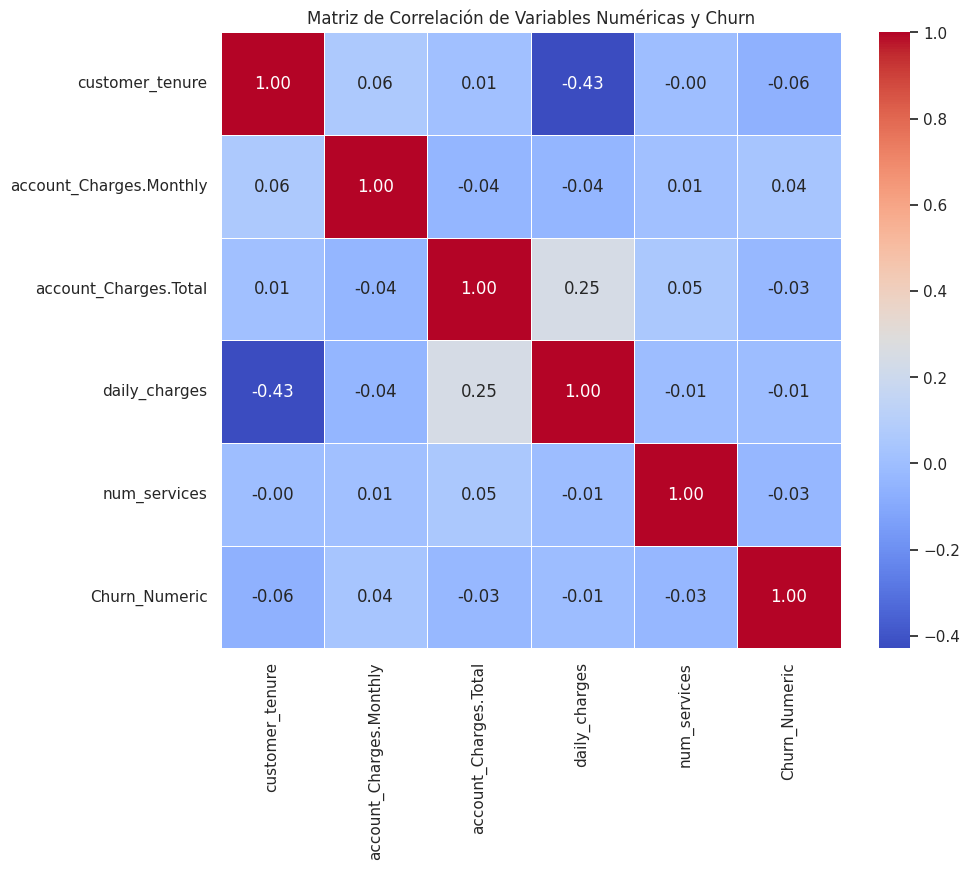

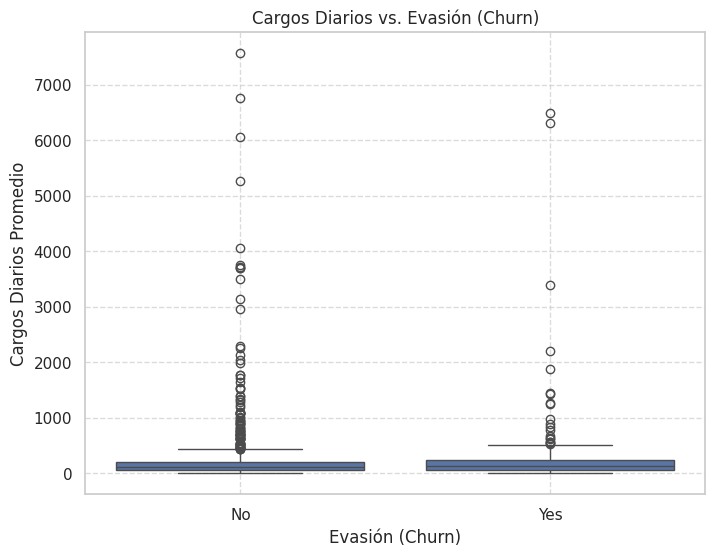

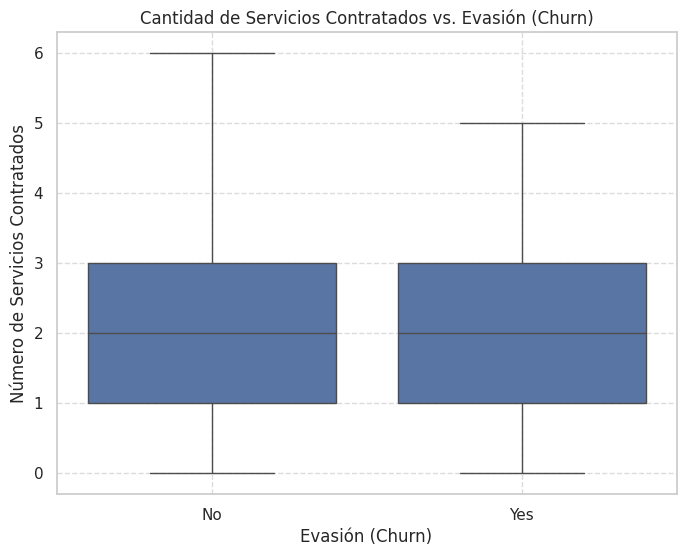

In [134]:


from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'customer_tenure': np.random.randint(1, 72, 1000),
    'account_Charges.Monthly': np.random.uniform(20, 120, 1000),
    'account_Charges.Total': np.random.uniform(20, 8000, 1000),
    'internet_OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
    'internet_OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
    'internet_DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
    'internet_TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
    'internet_StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
    'internet_StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
    'phone_MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], 1000),
    'Churn': np.random.choice(['Yes', 'No'], 1000, p=[0.26, 0.74]) # Proporción de churn simulada
}
df_final = pd.DataFrame(data)

# Asegurarse de que 'account_Charges.Total' sea numérico y manejar nulos/errores
# En tu notebook, esto ya se haría en la sección de limpieza.
df_final['account_Charges.Total'] = pd.to_numeric(df_final['account_Charges.Total'], errors='coerce')
df_final['account_Charges.Total'] = df_final['account_Charges.Total'].fillna(0)

# --- Preparación de variables para el análisis de correlación ---

# 1. Convertir 'Churn' a formato numérico (0 y 1)
# 'Yes' (Churn) será 1, 'No' (No Churn) será 0.
df_final['Churn_Numeric'] = df_final['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 2. Calcular la 'cuenta diaria' (cargos totales / antigüedad)
# Manejar el caso de 'customer_tenure' igual a 0 para evitar división por cero.
df_final['daily_charges'] = df_final.apply(
    lambda row: row['account_Charges.Total'] / row['customer_tenure'] if row['customer_tenure'] > 0 else 0,
    axis=1
)

# 3. Calcular la cantidad de servicios contratados
# Identificar las columnas que representan servicios adicionales.
# Asumimos que 'No internet service' o 'No phone service' significa que el servicio no está contratado.
service_columns = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies',
    'phone_MultipleLines'
]

# Contar el número de services activos para cada cliente.
# Se considera "activo" si el valor NO es 'No' o 'No internet service'/'No phone service'.
df_final['num_services'] = df_final.apply(
    lambda row: sum(
        1 for col in service_columns
        if row[col] == 'Yes'
    ),
    axis=1
)

# --- Cálculo de Correlaciones ---

# Seleccionar solo las columnas numéricas relevantes para la correlación.
# Incluimos las nuevas variables calculadas y las originales que nos interesan.
numeric_cols_for_corr = [
    'customer_tenure',
    'account_Charges.Monthly',
    'account_Charges.Total',
    'daily_charges',
    'num_services',
    'Churn_Numeric'
]

# Calcular la matriz de correlación.
correlation_matrix = df_final[numeric_cols_for_corr].corr()

print("Matriz de Correlación:")
print(correlation_matrix)

# --- Visualización de Correlaciones ---

# 1. Mapa de Calor de la Matriz de Correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas y Churn')
plt.show()

# 2. Gráfico de Dispersión: Cuenta Diaria vs. Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='daily_charges', data=df_final)
plt.title('Cargos Diarios vs. Evasión (Churn)')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Cargos Diarios Promedio')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 3. Gráfico de Dispersión: Cantidad de Servicios Contratados vs. Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='num_services', data=df_final)
plt.title('Cantidad de Servicios Contratados vs. Evasión (Churn)')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Número de Servicios Contratados')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()